In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Read Data from CSV file
data = pd.read_csv('Train_data.csv')

In [3]:
# Getting Stats of data read from CSV file
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [4]:
# checking for null values

data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [5]:
# checking for stats

data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# check for duplicates

data.duplicated().sum()

0

# Label Encoding

In [7]:
# handling categorical varaibles 
# checking for unique values in 

from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder for each categorical variable
le_protocol_type = LabelEncoder()
le_service = LabelEncoder()
le_flag = LabelEncoder()
class_encoder = LabelEncoder()

# Encode the categorical variables in the dataframe using the fitted label encoders
data['protocol_type'] = le_protocol_type.fit_transform(data['protocol_type'])
data['service'] = le_service.fit_transform(data['service'])
data['flag'] = le_flag.fit_transform(data['flag'])
data['class'] = class_encoder.fit_transform(data['class'])

<Axes: xlabel='class', ylabel='count'>

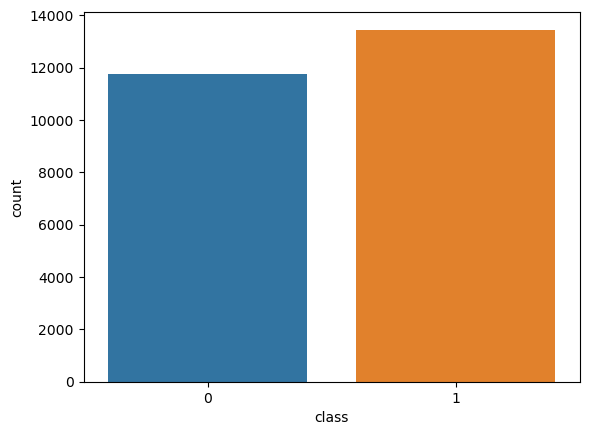

In [8]:
##  checking for target distribution

sns.countplot(x = data['class'])

# Min Max Normalization

In [9]:
## code

from sklearn.preprocessing import MinMaxScaler


# Create an instance of MinMaxScaler and fit-transform the dataframe
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(data)

# Convert the normalized data array back to a dataframe
normalized_data = pd.DataFrame(normalized_data, columns=data.columns)

In [10]:
# storing normalized data in df

df = normalized_data.copy()

In [11]:
# Data Modelling

from sklearn.model_selection import train_test_split

X = (data.drop(['class'],axis=1))

Y = (data['class'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Emperor Penguin Optimization

In [12]:
def evaluate_fitness(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred)


def emperor_penguin_optimization(X_train, X_test, y_train, y_test, max_iter, pop_size):
    n_features = X_train.shape[1]
    penguin_population = np.random.rand(pop_size, n_features)
    fitness = np.zeros(pop_size)
    for i in range(max_iter):
        for j in range(pop_size):
            penguin = penguin_population[j, :]
            selected_features = (penguin > 0.5).astype(int)
            X_train_selected = X_train.iloc[:, selected_features == 1]
            X_test_selected = X_test.iloc[:, selected_features == 1]
            fitness[j] = evaluate_fitness(X_train_selected, X_test_selected, y_train, y_test)
        best_penguin = penguin_population[np.argmax(fitness), :]
        best_features = (best_penguin > 0.5).astype(int)
        print(f"Iteration {i+1}: Best fitness score = {max(fitness)}")
        print(f"Best set of features: {best_features}")
        penguin_population = generate_new_population(penguin_population, fitness)
    best_penguin = penguin_population[np.argmax(fitness), :]
    best_features = (best_penguin > 0.5).astype(int)
    return best_features


def generate_new_population(penguin_population, fitness):
    pop_size = penguin_population.shape[0]
    fitness_normalized = fitness / np.sum(fitness)
    sorted_index = np.argsort(-fitness_normalized)
    selected_parents = penguin_population[sorted_index[:pop_size // 2], :]
    offspring_population = generate_offspring(selected_parents)
    new_population = np.concatenate((selected_parents, offspring_population), axis=0)
    return new_population


def generate_offspring(selected_parents):
    pop_size, n_features = selected_parents.shape
    offspring_population = np.zeros((pop_size, n_features))
    for i in range(pop_size):
        parent1_index = i % (pop_size // 2)
        parent2_index = (i+1) % (pop_size // 2)
        crossover_point = np.random.randint(n_features)
        offspring = np.concatenate((selected_parents[parent1_index, :crossover_point],
                                     selected_parents[parent2_index, crossover_point:]))
        mutation_rate = 1 / n_features
        mask = np.random.rand(n_features) < mutation_rate
        offspring[mask] = 1 - offspring[mask]
        offspring_population[i, :] = offspring
    return offspring_population


In [13]:
selected_features = emperor_penguin_optimization(X_train, X_test, y_train,  y_test, 4, 4),

Iteration 1: Best fitness score = 0.9986108354832308
Best set of features: [1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1
 1 1 1 0]
Iteration 2: Best fitness score = 0.9982139313355824
Best set of features: [1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1
 1 1 1 0]
Iteration 3: Best fitness score = 0.9982139313355824
Best set of features: [1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1
 1 0 1 0]
Iteration 4: Best fitness score = 0.9984123834094066
Best set of features: [1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1
 1 0 1 0]


In [14]:
# displaying selected columns
column_names = X_train.columns.to_list()
column_names

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [15]:
selected_feature_names = [column_names[i] for i, selected in enumerate(selected_features[0]) if selected]
print(selected_feature_names)


['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land', 'num_failed_logins', 'logged_in', 'su_attempted', 'num_file_creations', 'num_shells', 'is_host_login', 'count', 'srv_count', 'serror_rate', 'srv_rerror_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_rerror_rate']


In [16]:
# Data Selection For Model Training 

# Data Modelling

from sklearn.model_selection import train_test_split

X = np.array(data[selected_feature_names])

Y = np.array(data['class'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
# reshaping the data

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
 

In [18]:
# Model Training Using BI LSTM

from tensorflow import keras

model = keras.Sequential([
    keras.layers.Input(shape=(X_train[0].shape)),
    keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

Epoch 1/10
1008/1008 [==============================] - 11s 6ms/step - loss: 0.1339 - accuracy: 0.9514 - val_loss: 0.0984 - val_accuracy: 0.9707
Epoch 2/10
1008/1008 [==============================] - 7s 7ms/step - loss: 0.1067 - accuracy: 0.9612 - val_loss: 0.0957 - val_accuracy: 0.9648
Epoch 3/10
1008/1008 [==============================] - 6s 6ms/step - loss: 0.1024 - accuracy: 0.9622 - val_loss: 0.0958 - val_accuracy: 0.9663
Epoch 4/10
1008/1008 [==============================] - 6s 6ms/step - loss: 0.0965 - accuracy: 0.9649 - val_loss: 0.0903 - val_accuracy: 0.9650
Epoch 5/10
1008/1008 [==============================] - 6s 6ms/step - loss: 0.0964 - accuracy: 0.9656 - val_loss: 0.0842 - val_accuracy: 0.9730
Epoch 6/10
1008/1008 [==============================] - 6s 6ms/step - loss: 0.0991 - accuracy: 0.9632 - val_loss: 0.0891 - val_accuracy: 0.9653
Epoch 7/10
1008/1008 [==============================] - 6s 6ms/step - loss: 0.0959 - accuracy: 0.9615 - val_loss: 0.0827 - val_accuracy

In [19]:
# classification report

from sklearn.metrics import classification_report
import pandas as pd

# Make predictions
y_pred = model.predict(X_test)

y_pred= [(1 if prob >= 0.5 else 0) for prob in y_pred]

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert report to dataframe
report_df = pd.DataFrame(report).transpose()

# Print the report dataframe
display(report_df)

158/158 [==============================] - 2s 1ms/step


,precision,recall,f1-score,support
0,0.971282,0.958140,0.964666,2365.000000
1,0.963415,0.974944,0.969145,2674.000000
accuracy,0.967057,0.967057,0.967057,0.967057
macro avg,0.967348,0.966542,0.966905,5039.000000
weighted avg,0.967107,0.967057,0.967043,5039.000000


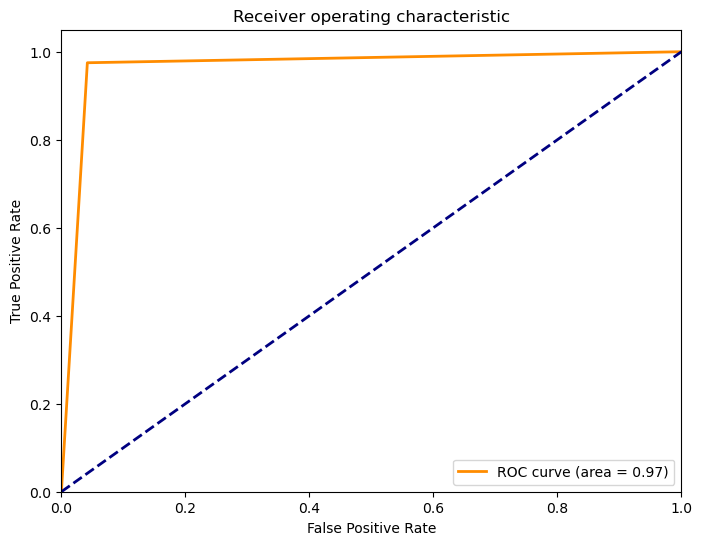

In [20]:
# Compute ROC curve and area under the curve (AUC)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

An AUC (Area Under the ROC Curve) of 0.98 means that the model is performing very well in distinguishing between the two classes. A perfect model would have an AUC of 1.0, while a random model would have an AUC of 0.5.

In general, an AUC value of 0.9 or above is considered to be excellent, while a value between 0.8 and 0.9 is good, and a value between 0.7 and 0.8 is considered fair. However, the interpretation of AUC can depend on the specific context of the problem and the domain knowledge.

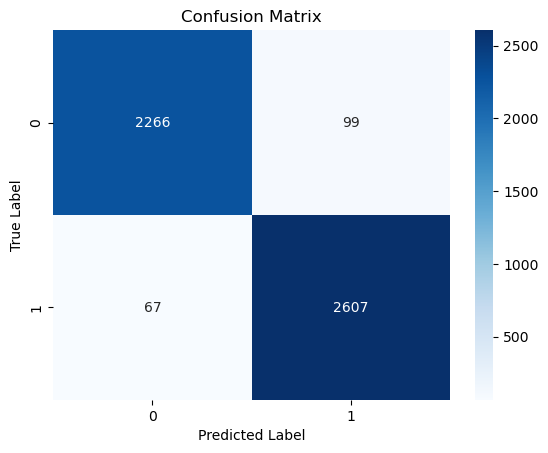

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix in a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True negatives (TN): ", tn)
print("False positives (FP): ", fp)
print("False negatives (FN): ", fn)
print("True positives (TP): ", tp)

True negatives (TN):  2266
False positives (FP):  99
False negatives (FN):  67
True positives (TP):  2607
